# Clasificarea imaginilor cu fete in functie de emotia sugerata (angry, disgust, fear, happy, neutral, sad, surprise)

### Pasul 1 - incarcarea datelor si afisarea distributiei lor

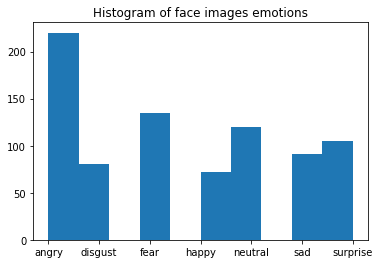

In [34]:
from utils import *

inputs, outputs = load_face_images_arrays_rgb()

plot_data_histograms(outputs, 'face images emotions')

### Pasul 2 - utilizarea unui clasificator ce foloseste modele de extragere preantrenate (MTCNN)

In [35]:
from fer import FER

detector = FER(mtcnn=True)
computed_outputs = [detector.top_emotion(image)[0] for image in inputs]
for i in range(len(computed_outputs)-1, -1, -1):
    if computed_outputs[i] is None:
        computed_outputs.pop(i)
        outputs.pop(i)

### Pasul 3 - Calculul acuratetii si afisarea matricei de confuzie

Accuracy: 0.45252225519287836


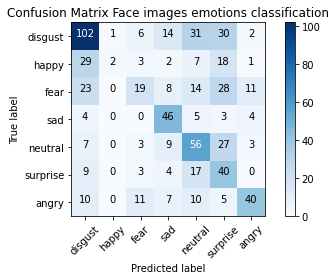

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

# calculul acuratetii
accuracy = accuracy_score(outputs, computed_outputs)
print('Accuracy:', accuracy)

# afisarea matricei de confuzie
cm = confusion_matrix(outputs, computed_outputs)
label_names = list(set(outputs))
plot_confusion_matrix(cm, label_names, 'Face images emotions classification')